In [1]:
import pandas as pd 
import numpy as np 


In [2]:
db = pd.read_csv("/content/drive/MyDrive/heart.csv")
display(db)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
##check if i have gpu 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
data= db.sample(frac=1)
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
dataset = data.values 
Y_train = dataset[:,13]
X_train = dataset[:,0:12]
Y_train,X_train

(array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 12) 
x_train.shape

(242, 12)

In [7]:
db["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import  Dense
from tensorflow.keras.models import Sequential

In [9]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_data

<TensorSliceDataset shapes: ((12,), ()), types: (tf.float64, tf.float64)>

In [10]:
model = Sequential()
model.add(Dense(12, input_dim = 12, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 250, batch_size = 50, validation_data=(x_test, y_test) ,verbose = 1)
 

Epoch 1/250
5/5 [==============================] - 3s 59ms/step - loss: 49.6212 - accuracy: 0.5331 - val_loss: 39.1865 - val_accuracy: 0.5902
Epoch 2/250
5/5 [==============================] - 0s 11ms/step - loss: 43.5812 - accuracy: 0.5331 - val_loss: 34.0924 - val_accuracy: 0.5902
Epoch 3/250
5/5 [==============================] - 0s 11ms/step - loss: 37.8569 - accuracy: 0.5331 - val_loss: 29.3170 - val_accuracy: 0.5902
Epoch 4/250
5/5 [==============================] - 0s 10ms/step - loss: 32.4141 - accuracy: 0.5331 - val_loss: 24.9436 - val_accuracy: 0.5902
Epoch 5/250
5/5 [==============================] - 0s 9ms/step - loss: 27.4378 - accuracy: 0.5331 - val_loss: 20.8603 - val_accuracy: 0.5902
Epoch 6/250
5/5 [==============================] - 0s 10ms/step - loss: 22.7541 - accuracy: 0.5331 - val_loss: 17.0140 - val_accuracy: 0.5902
Epoch 7/250
5/5 [==============================] - 0s 9ms/step - loss: 18.5905 - accuracy: 0.5331 - val_loss: 13.3037 - val_accuracy: 0.5902
Epoch 8/

In [11]:
accuracy = model.evaluate(x_train, y_train)
val_accuracy = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.5234 - accuracy: 0.7213


In [12]:
prediction_test = model.predict(x_test)
prediction_train = model.predict(x_train)

rounded2 = [round(x[0]) for x in prediction_test]


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
prediction = model.predict(x_test)
expected = y_test

matrix = confusion_matrix(expected,rounded2, labels=[1,0])
print('Confusion matrix : \n',matrix)
matrix = classification_report(expected,rounded2,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[29  7]
 [10 15]]
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.81      0.77        36
           0       0.68      0.60      0.64        25

    accuracy                           0.72        61
   macro avg       0.71      0.70      0.71        61
weighted avg       0.72      0.72      0.72        61



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper right '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


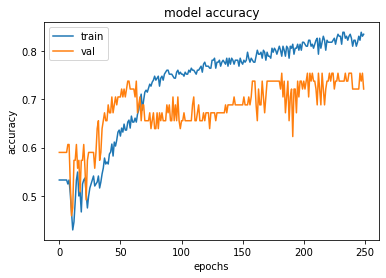

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right ')
plt.show()

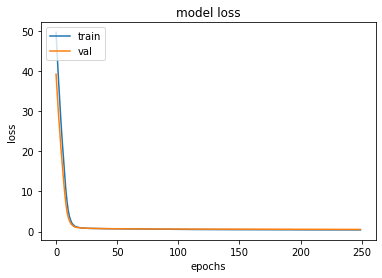

In [15]:
##visualize the model performance
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
#from keras.models import model_from_json
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
    #json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")